In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

#1.Reading the Dataset BikeSharingDay
import csv
import pandas as pd

#Import Matplotlib for the Plotting
import matplotlib as plt
%matplotlib inline

#Dataset BikeSharing
filename='BikeSharingDay.csv'

#Reading the CSV-File as dataframe
dataframe = pd.read_csv(filename)

#print the head of the dataset
dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
#List the Data types to See the changes

dataframe.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [47]:
#Changing the Dataset to the right data-typ

#deklaration of the changed datafram
chgDataframe = dataframe

#Die unten gelöschte Attribute werden in unserem Model nicht gebraucht
#und stellt keine Aussage da
chgDataframe = chgDataframe.drop(['yr'], axis=1)
chgDataframe = chgDataframe.drop(['instant'], axis=1)

#Change dteday type from 'object' to 'Date'
chgDataframe.loc[:,'dteday'] = pd.to_datetime(chgDataframe.dteday, format='%Y %m %d')

chgDataframe.dtypes

dteday        datetime64[ns]
season                 int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [48]:
#da atemp mit sehr stark

#Koorolations Matrix
corr = chgDataframe.corr()
corr.style.background_gradient(cmap='bwr')


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545


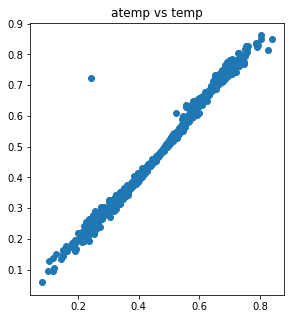

In [49]:
#Da uns auffält das atemp und temp sehr stark mit einander korrelieren
# betrachte wir die zwei Attribute genauer

fig = plt.pyplot.figure(figsize=(10,5))
plt1 = fig.add_subplot(121)
plt1.set_title('atemp vs temp')
plt1.scatter(chgDataframe["atemp"], chgDataframe["temp"])

In [50]:
#Wir sehen das die atemp genauso sie steigert wie temp
#dadurch können atemp aus unserem Datensatz raus droppen
chgDataframe = chgDataframe.drop(['atemp'], axis=1)

In [51]:
# Weiter Attribute die mit einander Korrelieren sind:
# Season und Monat mit 0,831440
correlation = chgDataframe[["season","mnth"]].corr()
correlation.style.background_gradient(cmap='bwr')

,season,mnth
season,1.000000,0.831440
mnth,0.831440,1.000000


In [52]:
# dadurch nehmen wir monat aus unserem Datensatz
chgDataframe = chgDataframe.drop(['mnth'], axis=1)

In [53]:
# Da die Urlaubstage genauso berücktsichtig werden, 
# wie in dem Attribut weekday und workingday, 
# holiday rausschmeisen das selbe gilt für weekday
chgDataframe = chgDataframe.drop(['holiday'], axis=1)
chgDataframe = chgDataframe.drop(['weekday'], axis=1)

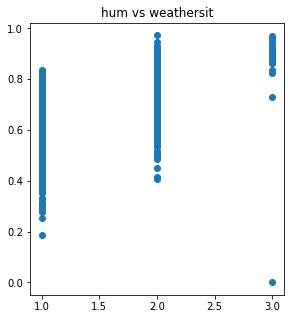

In [54]:
# Wir schauen uns als nächstes die Korrelation zwischen 
# hum und weathersit
fig = plt.pyplot.figure(figsize=(10,5))
plt1 = fig.add_subplot(121)
plt1.set_title('hum vs weathersit')
plt1.scatter(chgDataframe["weathersit"], chgDataframe["hum"])

         temp  weathersit  windspeed       hum
0    0.344167           2   0.160446  0.805833
1    0.363478           2   0.248539  0.696087
2    0.196364           1   0.248309  0.437273
3    0.200000           1   0.160296  0.590435
4    0.226957           1   0.186900  0.436957
..        ...         ...        ...       ...
726  0.254167           2   0.350133  0.652917
727  0.253333           2   0.155471  0.590000
728  0.253333           2   0.124383  0.752917
729  0.255833           1   0.350754  0.483333
730  0.215833           2   0.154846  0.577500

[731 rows x 4 columns]


<AxesSubplot:>

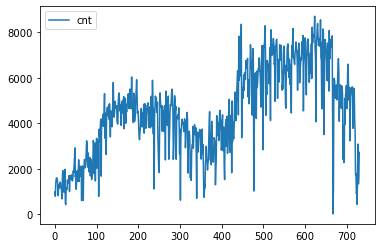

In [55]:
# Wir sehen anhand unseren Korrelationsmatrix 
# das die Attribute: weathersit, temp, windspeed, hum nicht
# mit einander Korrelieren deshalb werden diese Attribute im
# Model benützt
dataframe_X = chgDataframe[["temp","weathersit",'windspeed','hum']]
dataframe_y = chgDataframe[['cnt']]

print(dataframe_X)
dataframe_y.plot()

In [56]:
# Da Weather und Season Kategorisierte Attribute sind, müssen
# wir diese zu Binäre Werte umwandeln
# wir erstellen für jede Kategorie die entsprechnde 
# Binärische Tabelle und geben es dem Datensatz weiter und
# löschen das Attribut weathersit
clear = []
cloudy = []
rain = []
snow = []

# Alle Wetter situationen werden alls binäre Arrays weiter gegeben, dabei wird
# 1 als true und 0 als false angegeben
index = 0
for i in chgDataframe.weathersit:
    if(i == 1):
        clear.append(1)
        cloudy.append(0)
        rain.append(0)
        snow.append(0)
    elif(i == 2):
        clear.append(0)
        cloudy.append(1)
        rain.append(0)
        snow.append(0)
    elif(i == 3):
        clear.append(0)
        cloudy.append(0)
        rain.append(1)
        snow.append(0)
    elif(i == 4):
        clear.append(0)
        cloudy.append(0)
        rain.append(0)
        snow.append(1)
    index += 1

chgDataframe['weatherClear'] = clear
chgDataframe['weatherCloudy'] = cloudy
chgDataframe['weatherRain'] = rain
chgDataframe['weatherSnow'] = snow
chgDataframe = chgDataframe.drop(['weathersit'], axis=1)

In [57]:
# das selbe mit season
spring = []
summer = []
fall = []
winter = []

# Alle Jahreszeiten werden alls binäre Arrays weiter gegeben, dabei wird
# 1 als true und 0 als false angegeben
index = 0
for i in chgDataframe.season:
    if(i == 1):
        spring.append(1)
        summer.append(0)
        fall.append(0)
        winter.append(0)
    elif(i == 2):
        spring.append(0)
        summer.append(1)
        fall.append(0)
        winter.append(0)
    elif(i == 3):
        spring.append(0)
        summer.append(0)
        fall.append(1)
        winter.append(0)
    elif(i == 4):
        spring.append(0)
        summer.append(0)
        fall.append(0)
        winter.append(1)
    index += 1

chgDataframe['seasonSpring'] = spring
chgDataframe['seasonSummer'] = summer
chgDataframe['seasonFall'] = fall
chgDataframe['seasonWinter'] = winter
chgDataframe = chgDataframe.drop(['season'], axis=1)

In [58]:
# Da registered + casual = cnt und cnt unser Ziel Klasse ist werde diese
# raus geschmisse
saveFile = chgDataframe.drop(['registered','casual'], axis=1)
saveFile.to_csv('BikeSharingDayNew.csv')

dataframe_y = chgDataframe.cnt
dataframe_X = chgDataframe.drop(['cnt','registered','casual','dteday','seasonWinter','seasonFall', 'weatherSnow'], axis=1)
print(chgDataframe)

        dteday  workingday      temp       hum  windspeed  casual  registered  \
0   2011-01-01           0  0.344167  0.805833   0.160446     331         654   
1   2011-01-02           0  0.363478  0.696087   0.248539     131         670   
2   2011-01-03           1  0.196364  0.437273   0.248309     120        1229   
3   2011-01-04           1  0.200000  0.590435   0.160296     108        1454   
4   2011-01-05           1  0.226957  0.436957   0.186900      82        1518   
..         ...         ...       ...       ...        ...     ...         ...   
726 2012-12-27           1  0.254167  0.652917   0.350133     247        1867   
727 2012-12-28           1  0.253333  0.590000   0.155471     644        2451   
728 2012-12-29           0  0.253333  0.752917   0.124383     159        1182   
729 2012-12-30           0  0.255833  0.483333   0.350754     364        1432   
730 2012-12-31           1  0.215833  0.577500   0.154846     439        2290   

      cnt  weatherClear  we

In [59]:
# Unser erster Versuch eine Lineare Regression aufzubauen anhand 
# unseren geänderten Datensatz

# 1. Wir erstellen unseren Modell
dataframeStdY = dataframe_y
# 2. Wir schauen uns nochmal die Korrelationsmatrix
corr = dataframe_X.corr()
corr.style.background_gradient(cmap='bwr')

,workingday,temp,hum,windspeed,weatherClear,weatherCloudy,weatherRain,seasonSpring,seasonSummer
workingday,1.000000,0.052660,0.024327,-0.018796,-0.059165,0.050099,0.028820,-0.025926,0.014543
temp,0.052660,1.000000,0.126963,-0.157944,0.116091,-0.097706,-0.058238,-0.619800,0.155424
hum,0.024327,0.126963,1.000000,-0.248489,-0.575317,0.491834,0.267011,-0.181336,-0.003854
windspeed,-0.018796,-0.157944,-0.248489,1.000000,-0.003964,-0.037408,0.117362,0.178154,0.097513
weatherClear,-0.059165,0.116091,-0.575317,-0.003964,1.000000,-0.938964,-0.226050,-0.023951,-0.023167
weatherCloudy,0.050099,-0.097706,0.491834,-0.037408,-0.938964,1.000000,-0.122859,0.032441,0.038836
weatherRain,0.028820,-0.058238,0.267011,0.117362,-0.226050,-0.122859,1.000000,-0.022764,-0.043136
seasonSpring,-0.025926,-0.619800,-0.181336,0.178154,-0.023951,0.032441,-0.022764,1.000000,-0.332716
seasonSummer,0.014543,0.155424,-0.003854,0.097513,-0.023167,0.038836,-0.043136,-0.332716,1.000000


In [60]:
dataframe_X.head(5)

,workingday,temp,hum,windspeed,weatherClear,weatherCloudy,weatherRain,seasonSpring,seasonSummer
0,0,0.344167,0.805833,0.160446,0,1,0,1,0
1,0,0.363478,0.696087,0.248539,0,1,0,1,0
2,1,0.196364,0.437273,0.248309,1,0,0,1,0
3,1,0.200000,0.590435,0.160296,1,0,0,1,0
4,1,0.226957,0.436957,0.186900,1,0,0,1,0


In [61]:
# Wir schaffen die Indizes raus aus dem Array
array_Y = []

for i in dataframe_y:
    array_Y.append(i)

dataframe_y = array_Y

In [62]:
# 3. Importieren
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

# 4. Wir nutzen erstmal TrainSplit mit randomSeed
x_train, x_test, y_train, y_test = train_test_split(dataframe_X, dataframe_y, test_size = 0.2, random_state = 7)




Richtig geschätzt:  75
falsch geschätzt:  72
Accuracy (in %):  51.02040816326531




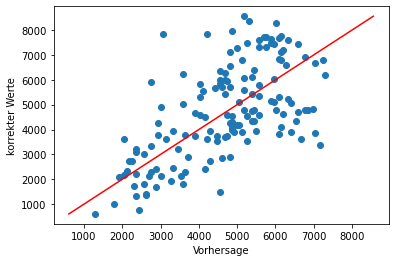

In [63]:
# 5. Wir erstellen die LineareRegression
model = LinearRegression()

# 6. Model füllen mit train daten
model.fit(x_train, y_train)

# 7. Vorhersage mit Testdaten
y_vorhersage = model.predict(x_test)

# Wir geben der prediction eine Range
# Die Predictions dürfen nur 100 leute mehr oder weniger vorhersagen
true = 0
index = 0
for k in y_test:
    i = y_vorhersage[index]
    # vorhersage -100 untere grenze
    kmin = k 
    # vorhersage +100 obere grenze
    kmax = k 
    
    # wenn zwischen untere grenze und obere grenze
    # dann: zähle die Vorhersage als richtig
    if(kmin <= i >= kmax):
        true+=1
        index = index + 1
        continue
    else:
        index = index + 1
        continue

false = len(x_test)-true
print('\n')
print('Richtig geschätzt: ', true)
print('falsch geschätzt: ', false)
    
print('Accuracy (in %): ', true/x_test.shape[0]*100)
print('\n')
   
   
plt.pyplot.scatter(y_vorhersage, y_test)
    
minimum = math.ceil(min(y_test))
maximum = math.ceil(max(y_test))
    
plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
plt.pyplot.xlabel('Vorhersage')
plt.pyplot.ylabel('korrekter Werte')
plt.pyplot.show()

In [64]:
# 8. Berechnung der Mean Squared Error
mse = mean_squared_error(y_test, y_vorhersage)

print('MSE: ', mse)

MSE:  2258725.673469388




Fold Nummer:  0




Richtig geschätzt:  90
falsch geschätzt:  57
Accuracy (in %):  61.224489795918366


ME:  2258725.673469388




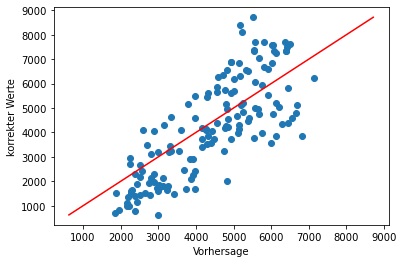



Fold Nummer:  1




Richtig geschätzt:  75
falsch geschätzt:  71
Accuracy (in %):  51.369863013698634


ME:  2258725.673469388




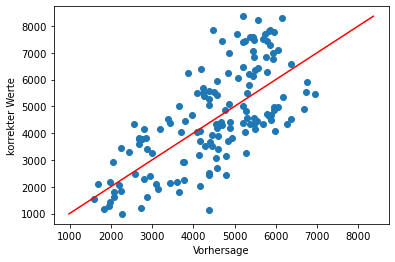



Fold Nummer:  2




Richtig geschätzt:  70
falsch geschätzt:  76
Accuracy (in %):  47.94520547945205


ME:  2258725.673469388




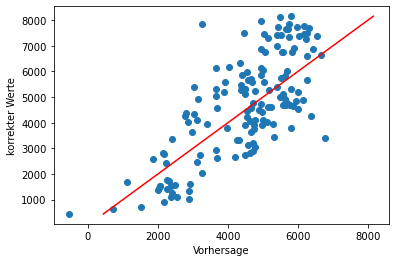



Fold Nummer:  3




Richtig geschätzt:  69
falsch geschätzt:  77
Accuracy (in %):  47.26027397260274


ME:  2258725.673469388




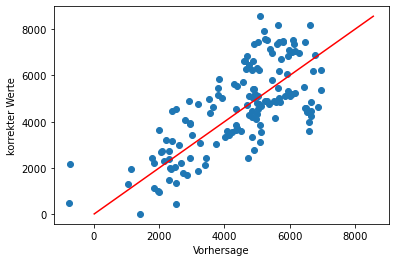



Fold Nummer:  4




Richtig geschätzt:  91
falsch geschätzt:  55
Accuracy (in %):  62.328767123287676


ME:  2258725.673469388




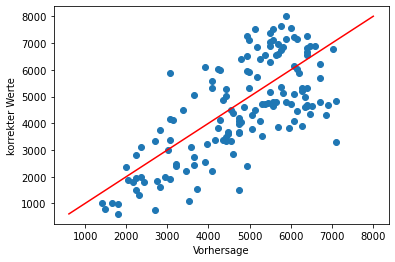

In [65]:
# Wir versuch diesmal eine 5 fache Crossvalidation zu machen
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import KFold

seed = 32
kfold = KFold(n_splits=5, shuffle = True, random_state=seed)
indexFold = 0

for train_index, test_index in kfold.split(dataframe_X, dataframeStdY):
    
    x_train, x_test = dataframe_X.iloc[list(train_index)], dataframe_X.iloc[list(test_index)]
    y_train, y_test = dataframeStdY.iloc[list(train_index)], dataframeStdY.iloc[list(test_index)]
    
    # Linear Regression
    linearR = LinearRegression()

    # daten füllen aus dem Folds
    model = linearR.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    # Wir geben der prediction eine Range
    # Die Predictions dürfen nur 100 leute mehr oder weniger vorhersagen
    true = 0
    index = 0
    for k in y_test:
        
        i = y_pred[index]
        # vorhersage -100 untere grenze
        kmin = k 
        # vorhersage +100 obere grenze
        kmax = k
        # wenn zwischen untere grenze und obere grenze
        # dann: zähle die Vorhersage als richtig
        
        if(kmin <= i >= kmax):
            true+=1
            index = index + 1
            continue
        else:
            index = index + 1
            continue
            
    print('\n')
    print('Fold Nummer: ', indexFold)
    print('\n')
    
    false = len(x_test)-true
    print('\n')
    print('Richtig geschätzt: ', true)
    print('falsch geschätzt: ', false)
    
    print('Accuracy (in %): ', true/x_test.shape[0]*100)
    print('\n')
    
    me = mean_squared_error(y_test, y_pred,squared=False)
    print('ME: ', mse)
    print('\n')
            
    plt.pyplot.scatter(y_pred, y_test)
    
    minimum = math.ceil(min(y_test))
    maximum = math.ceil(max(y_test))
    
    plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
    plt.pyplot.xlabel('Vorhersage')
    plt.pyplot.ylabel('korrekter Werte')
    plt.pyplot.show()
    
    indexFold = indexFold + 1
    



Richtig geschätzt:  51
falsch geschätzt:  96
Accuracy (in %):  34.69387755102041




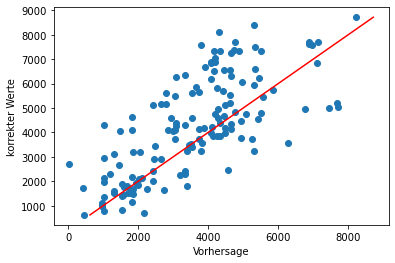



Richtig geschätzt:  60
falsch geschätzt:  86
Accuracy (in %):  41.0958904109589




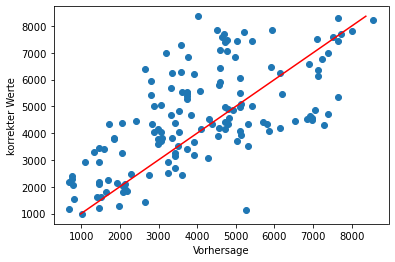



Richtig geschätzt:  43
falsch geschätzt:  103
Accuracy (in %):  29.45205479452055




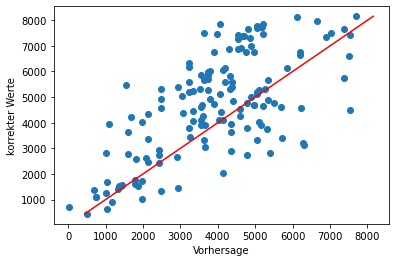



Richtig geschätzt:  47
falsch geschätzt:  99
Accuracy (in %):  32.19178082191781




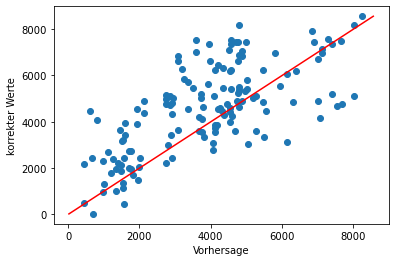



Richtig geschätzt:  52
falsch geschätzt:  94
Accuracy (in %):  35.61643835616438




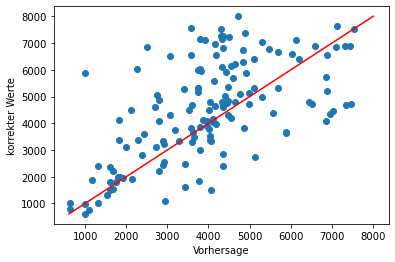

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Jetz probieren wir den Polynomials 2 Grades

# mit 5 fache Crossvalidation
for train_index, test_index in kfold.split(dataframe_X, dataframeStdY):
    
    x_train, x_test = dataframe_X.iloc[list(train_index)], dataframe_X.iloc[list(test_index)]
    y_train, y_test = dataframeStdY.iloc[list(train_index)], dataframeStdY.iloc[list(test_index)]
        
    scaler = StandardScaler()
    scaler.fit(x_train)

    X_train = scaler.transform(x_train)
    X_test = scaler.transform(x_test)
    
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(x_train, y_train)
    
    y_pred = classifier.predict(x_test)
    
    # Wir geben der prediction eine Range
    # Die Predictions dürfen nur 100 leute mehr oder weniger vorhersagen
    true = 0
    index = 0
    for k in y_test:
        i = y_pred[index]
        # vorhersage -100 untere grenze
        kmin = k
        # vorhersage -100 obere grenze
        kmax = k
        # wenn zwischen untere grenze und obere grenze
        # dann: zähle die Vorhersage als richtig
        if(kmin <= i >= kmax):
            true+=1
            index = index + 1
            continue
        else:
            index = index + 1
            continue

    
    false = len(x_test)-true
    print('\n')
    print('Richtig geschätzt: ', true)
    print('falsch geschätzt: ', false)
    
    print('Accuracy (in %): ', true/x_test.shape[0]*100)
    print('\n')
      
    plt.pyplot.scatter(y_pred, y_test)
    
    minimum = math.ceil(min(y_test))
    maximum = math.ceil(max(y_test))
    
    plt.pyplot.plot( [minimum,maximum],[minimum,maximum], color='red')
    plt.pyplot.xlabel('Vorhersage')
    plt.pyplot.ylabel('korrekter Werte')
    plt.pyplot.show()